# Exploratory Data Analysis and apply Logistic Regression with Python
For this lecture we will be working with the Titanic Data Set from Kaggle.

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.


## Import Libraries
Let's import some libraries to get started!


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
import os
os.chdir("E:\\data.csv")

In [62]:
data=pd.read_csv("titanic_train.csv")

In [69]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [64]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
data.shape

(891, 12)

# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!


## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [70]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

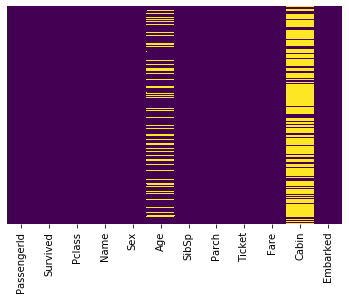

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Deletes all rows with missing values


In [71]:
data = data.dropna()

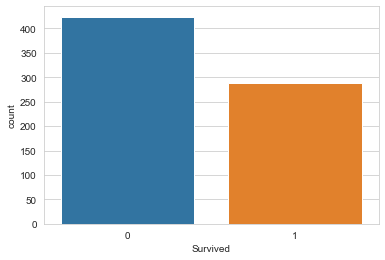

In [72]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

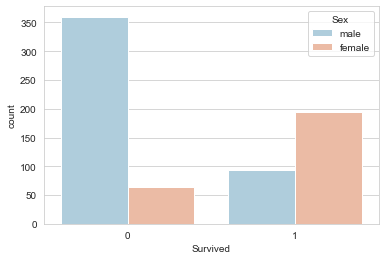

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

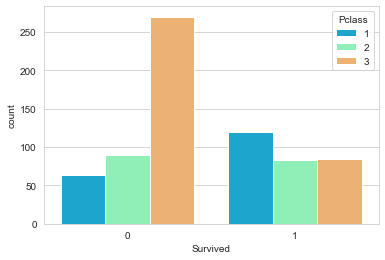

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

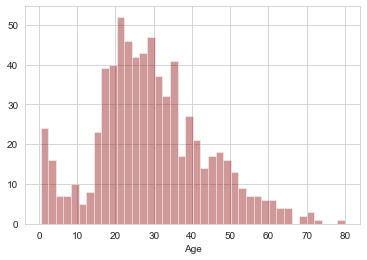

In [75]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

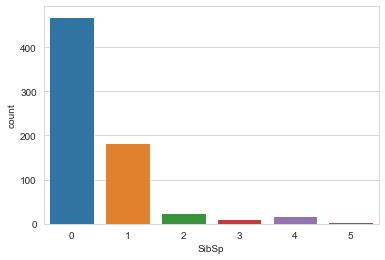

In [76]:
sns.countplot(x='SibSp',data=data)

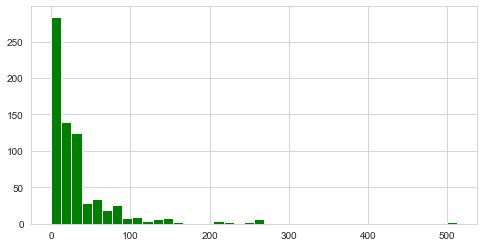

In [77]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

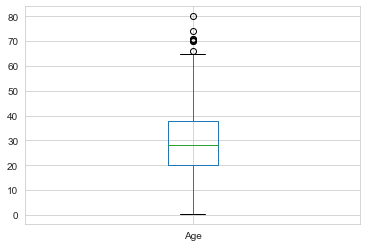

In [78]:
data.boxplot(column=["Age"])

<Figure size 864x504 with 0 Axes>

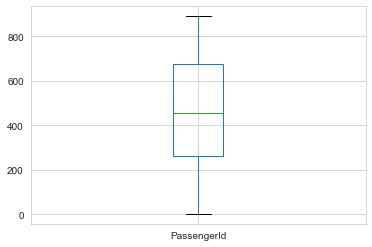

<Figure size 864x504 with 0 Axes>

In [17]:
data.boxplot(column=["PassengerId"])
plt.figure(figsize=(12, 7))

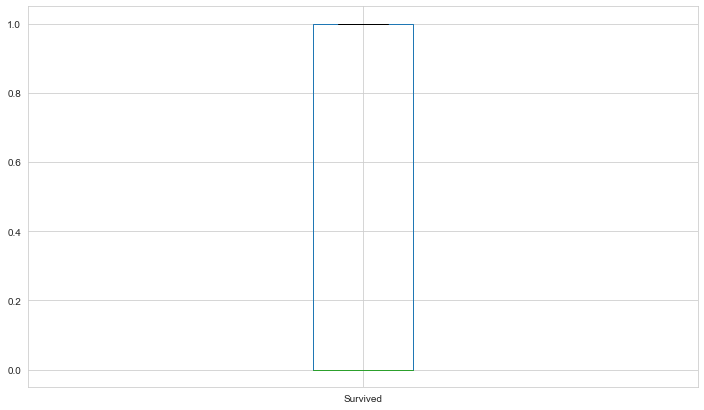

In [79]:

plt.figure(figsize=(12, 7))
data.boxplot(column=["Survived"])


<Figure size 864x504 with 0 Axes>

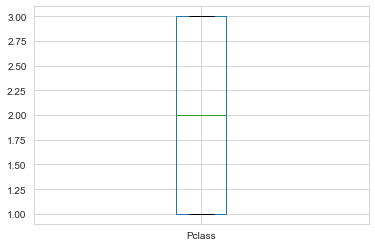

<Figure size 864x504 with 0 Axes>

In [80]:
data.boxplot(column=["Pclass"])

plt.figure(figsize=(12, 7))

In [20]:
# easy way to remove outliers
def sourav (data,age):
 Q1 = data[age].quantile(0.25)
 Q3 = data[age].quantile(0.75)
 IQR = Q3 - Q1
 data= data.loc[~((data[age] < (Q1 - 1.5 * IQR)) | (data[age] > (Q3 + 1.5 * IQR))),]
 return data

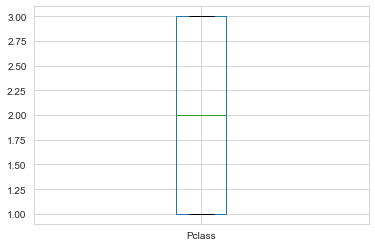

<Figure size 864x504 with 0 Axes>

In [81]:
data.boxplot(column=["Pclass"])
plt.figure(figsize=(12, 7))
data = sourav(data,"Pclass")

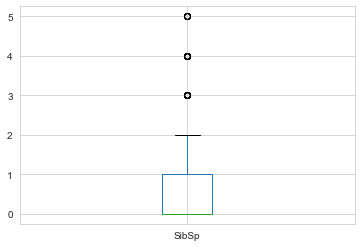

In [82]:
data.boxplot(column=["SibSp"])

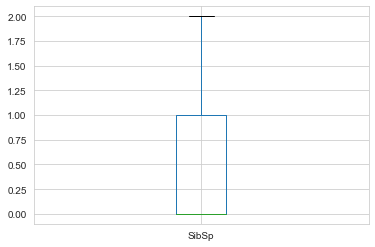

In [84]:
data.boxplot(column=["SibSp"])
data = sourav(data,"SibSp")

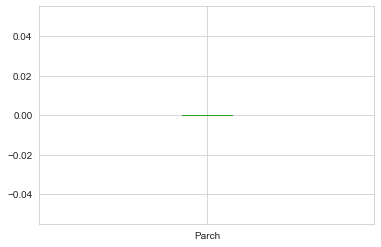

In [87]:
data.boxplot(column=["Parch"])
data = sourav(data,"Parch")

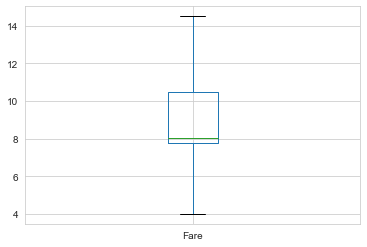

In [93]:
data.boxplot(column=["Fare"])
data = sourav(data,"Fare")

In [94]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
2,3,1,3,female,26.0,0,0,7.9250,S
4,5,0,3,male,35.0,0,0,8.0500,S
12,13,0,3,male,20.0,0,0,8.0500,S
14,15,0,3,female,14.0,0,0,7.8542,S


In [67]:
data=data.drop(["Name","Ticket","Cabin"],axis=1)

In [68]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [95]:
cat = data.loc[:,["Sex","Embarked"]]

In [30]:
cat

,Sex,Embarked
1,female,C
3,female,S
6,male,S
11,female,S
23,male,S
...,...,...
871,female,S
872,male,S
879,female,C
887,female,S


In [96]:
data = data.drop(["Sex","Embarked"],axis=1)

In [32]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
11,12,1,1,58.0,0,0,26.5500
23,24,1,1,28.0,0,0,35.5000
...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542
872,873,0,1,33.0,0,0,5.0000
879,880,1,1,56.0,0,1,83.1583
887,888,1,1,19.0,0,0,30.0000


In [97]:
dum = pd.get_dummies(cat.astype(str),drop_first=True)

In [98]:
dum.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
2,0,0,1
4,1,0,1
12,1,0,1
14,0,0,1


In [99]:
data = pd.concat([data,dum],axis=1)

In [100]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
12,13,0,3,20.0,0,0,8.0500,1,0,1
14,15,0,3,14.0,0,0,7.8542,0,0,1


# Building a Logistic Regression model

In [101]:
#Train Test Split
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,3,22.0,1,0,7.2500,1,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
12,13,3,20.0,0,0,8.0500,1,0,1
14,15,3,14.0,0,0,7.8542,0,0,1


In [102]:
data['Survived'].head()

0     0
2     1
4     0
12    0
14    0
Name: Survived, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1), 
                                                    data['Survived'], test_size=0.30, 
                                                    random_state=101)

# Training and Predicting

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Sourav Chowdhury\Anaconda34\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:

predictions = logmodel.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
accuracy=confusion_matrix(y_test,predictions)

In [110]:
accuracy

array([[60,  9],
       [13, 14]], dtype=int64)

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.7708333333333334

In [113]:

predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [52]:
from sklearn.metrics import classification_report

In [114]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85        69
           1       0.61      0.52      0.56        27

    accuracy                           0.77        96
   macro avg       0.72      0.69      0.70        96
weighted avg       0.76      0.77      0.76        96

